                     Selected Project: F1 Race Prediction for Media Company



---


Our client a leading media company specializing in motorsports coverage and analysis. With an ever-expanding audience of Formula 1 fanatics, they are determined to provide cutting-edge insights and predictions that will revolutionize the viewing experience for their subscribers.

The goal of this project is to leverage advanced machine learning techniques to develop a predictive model capable of accurately forecasting the top finishers in Formula 1 Grand Prix events. Achieving this will enhance viewer engagement, establish them as a thought leader in data-driven motorsports analysis, attract advertising and sponsorship opportunities, and gain a competitive advantage in the motorsport media landscape.


---



Project Benefits:

Enhanced Viewer Engagement: Imagine captivating our audience with insightful analysis driven by powerful predictions. This will undoubtedly lead to increased viewer engagement, ultimately translating to higher subscription rates and revenue growth.
Thought Leadership Status: The successful implementation of this project will solidify this media company’s position as a pioneer in data-driven motorsports analysis, establishing us as thought leaders in the industry.
Advertising and Sponsorship Opportunities: Imagine the allure of attracting sponsors and advertisers who want to be associated with cutting-edge analytics and innovative content. Accurate race predictions will make us a highly sought-after partner.
Deliverables:

A well-documented machine learning model: This model should be capable of predicting the top finishers (e.g., top 5 or top 10) in Formula 1 races with a high level of accuracy.
(Optional) A user-friendly interface or dashboard.
Comprehensive report: This report should detail the model's architecture, performance metrics, and potential areas for future improvement.
Presentation: Here, you'll outline the project's methodology, findings, and recommendations for integrating the model into the media company’s content and analysis workflow.
Success Criteria:

Model Accuracy: The machine learning model must achieve a high level of accuracy in predicting the top finishers in Formula 1 races, as measured on a separate test dataset.
Competitive Advantage: This project's ultimate goal is to provide the media company with a significant edge in the motorsport media landscape. By offering accurate and insightful race predictions, we'll attract new subscribers and sponsors, solidifying our leadership position.
Project Guidelines:

Timely completion and submission of project deliverables by the given deadline.
Deep dive into the provided dataset to explore relationships between different features.
Implementation and comparison of the performance of chosen algorithms on the dataset.
Fine-tuning of the best performing model to maximize prediction accuracy.
Research and proposal of various machine learning algorithms suitable for the project.
Documenting the entire process, including code, results, and key decisions taken.
Preparation of a final presentation in PowerPoint format to showcase findings and recommendations.
Ensuring actionable recommendations supported by evidence from research findings.
Maintaining a high level of professionalism in communication and deliverables, including proper formatting, grammar, and citation practices in the report.
The data shared with you is not to be uploaded publicly on any platform(github,kaggle,etc). Feel free to incorporate any other data 'IN ADDITION' to the dataset provided.
Submission:

Submitting the Jupyter notebook containing analysis and model training.
Submitting the final report in .doc or PowerPoint Presentation format.
(Optional) Submitting the Power BI or Tableau dashboard.
NOTE: Create a zip file of the above mentioned for the final submission.


# **Packages**

In [4]:
import pandas as pd
import numpy as np

# ***Mounting the datasets from gdrive***

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Loading the datasets and converting them into Dataframes***

In [6]:
driver_details=pd.read_csv("/content/drive/MyDrive/BIA DATA/driver_details.csv")
race_details=pd.read_csv("/content/drive/MyDrive/BIA DATA/race_details.csv")
starting_grid=pd.read_csv("/content/drive/MyDrive/BIA DATA/starting_grids.csv")
practices=pd.read_csv("/content/drive/MyDrive/BIA DATA/practices.csv")
fastestlaps=pd.read_csv("/content/drive/MyDrive/BIA DATA/fastestlaps_detailed.csv")
race_summaries=pd.read_csv("/content/drive/MyDrive/BIA DATA/race_summaries.csv")
piststop=pd.read_csv("/content/drive/MyDrive/BIA DATA/pitstops.csv")
qualifying=pd.read_csv("/content/drive/MyDrive/BIA DATA/qualifyings.csv")
race_summaries=pd.read_csv("/content/drive/MyDrive/BIA DATA/race_summaries.csv")


# ***Using inner join to join the datasets***

In [7]:
df1 = pd.merge(driver_details, race_details, on='Key', how='inner')

In [8]:
print(driver_details.shape,race_details.shape,df1.shape)

(19814, 8) (23978, 12) (18202, 19)


In [9]:
df2=pd.merge(df1, starting_grid, on='Key', how='inner')

In [10]:
print(df1.shape,starting_grid.shape,df2.shape)

(18202, 19) (22529, 10) (16855, 28)


In [11]:
df2.drop(['Grand Prix_x', 'Car_x', 'Year_x', 'Driver_x'], axis=1, inplace=True)

In [12]:
df3=pd.merge(df2, practices, on='Key', how='inner')

In [13]:
print(df2.shape,practices.shape,df3.shape)

(16855, 24) (37089, 12) (30131, 35)


In [14]:
df3.drop(['DriverCode_x'], axis=1, inplace=True)

In [15]:
df4=pd.merge(df3, fastestlaps, on='Key', how='inner')

In [16]:
print(df3.shape,fastestlaps.shape,df4.shape)

(30131, 34) (15512, 19) (28967, 52)


In [17]:
df4.drop(['Grand Prix_x', 'Car_x', 'Detail_x', 'Year_x', 'Driver_x'], axis=1, inplace=True)

In [18]:
df5=pd.merge(df4, piststop, on='Key', how='inner')

In [19]:
print(df4.shape,piststop.shape,df5.shape)

(28967, 47) (20293, 12) (50112, 58)


In [20]:
df5.drop(['DriverCode_x'], axis=1, inplace=True)

In [21]:
df6=pd.merge(df5, qualifying, on='Key', how='inner')

In [22]:
print(df5.shape,qualifying.shape,df6.shape)

(50112, 57) (17236, 14) (53991, 70)


In [23]:
df6.to_csv('bigdata.csv')

# ***DROPING COLUMNS THAT ARE NOT NECCESARY***

In [24]:
df6.columns

Index(['Date', 'driver PTS', 'driver  Position', 'Key', 'Pos', 'No_x',
       'Driver_y', 'Car_y', 'Race Laps', 'Race Time/Retired ', 'Race points',
       'Year_y', 'Grand Prix_y', 'Detail_y', 'DriverCode_y', 'startgrid No',
       'startgrid Pos', 'startgrid Time', 'Car_y', 'Practice Detail',
       'Driver_y', 'Gap', 'Grand Prix_y', 'Practice Laps', 'Practice No',
       'Practice Pos', 'Practice Time', 'Year_y', 'Avg Speed', 'Car_x',
       'Detail_x', 'Driver_x', 'DriverCode_y', 'Grand Prix_x',
       'no of fast Lap ', 'fastlaps no', 'fastlaps Pos ',
       'Time taken in fast laps', 'Time of day', 'Year_x', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Stops', 'No_y', 'Driver_y', 'Car_y', 'pitstop Lap',
       'Pitstop Time of day ', 'Pitstop Total time ', 'Year_y', 'Grand Prix_y',
       'Detail_y', 'DriverCode_x', 'Car', 'Detail', 'Driver', 'DriverCode_y',
       'Grand Prix', 'qualifying Laps', 'qualifying No', 'quali

In [25]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns

In [26]:
df6.head(1)

,Date,driver PTS,driver Position,Key,Pos,No_x,Driver_y,Car_y,Race Laps,Race Time/Retired,Race points,Year_y,Grand Prix_y,Detail_y,DriverCode_y,startgrid No,startgrid Pos,startgrid Time,Car_y,Practice Detail,Driver_y,Gap,Grand Prix_y,Practice Laps,Practice No,Practice Pos,Practice Time,Year_y,Avg Speed,Car_x,Detail_x,Driver_x,DriverCode_y,Grand Prix_x,no of fast Lap,fastlaps no,fastlaps Pos,Time taken in fast laps,Time of day,Year_x,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Stops,No_y,Driver_y,Car_y,pitstop Lap,Pitstop Time of day,Pitstop Total time,Year_y,Grand Prix_y,Detail_y,DriverCode_x,Car,Detail,Driver,DriverCode_y,Grand Prix,qualifying Laps,qualifying No,qualifying Pos,qualifying Q1,qualifying Q2,qualifying Q3,qualifying Time,Year
0,17-Apr-94,0.0,DNF,Minardi Ford-Michele Alboreto-Pacific-1994,NC,24,Michele Alboreto,Minardi Ford,69.0,DNF,0.0,1994,Pacific,Starting-Grid,ALB,24,15,01:13.0,Minardi Ford,Practice-2,Michele Alboreto,+2.165s,Pacific,21.0,24,11,01:14.0,1994,NaN,Minardi Ford,Fastest-Laps,Michele Alboreto,ALB,Pacific,44.0,24,7,01:16.0,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,1,24,Michele Alboreto,Minardi Ford,19,14:24:39,27.693,1994,Pacific,Pit-Stop-Summary,ALB,Minardi Ford,Qualifying,Michele Alboreto,ALB,Pacific,20.0,24,15,NaN,NaN,NaN,01:13.0,1994


# ***EDA***

In [27]:
import pandas as pd
team_details=pd.read_csv("/content/drive/MyDrive/BIA DATA/team_details.csv")
team_details=team_details.dropna(axis=1)


In [28]:
max_points_year = team_details.loc[team_details['PTS'].idxmax(), 'Year']
max_points_year

2014

In [29]:
# Calculate total points for each year
df = team_details

max_points_per_year = df.groupby('Year')['PTS'].max()
print("Total points per year:")
pd.set_option('display.max_rows', None)  # Show all columns
years_vs_max_points=max_points_per_year.to_frame("years_vs_max_points")
years_vs_max_points.dtypes


Total points per year:


years_vs_max_points    float64
dtype: object

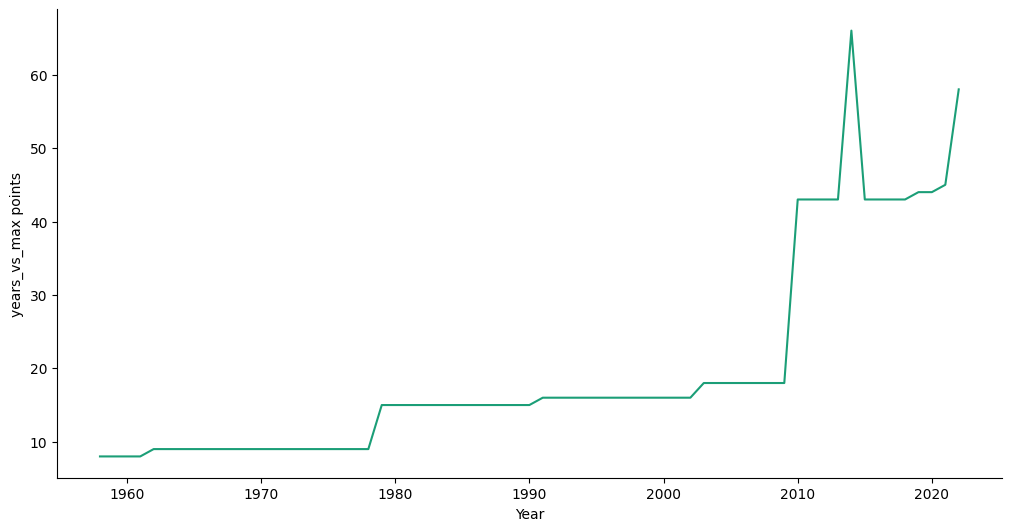

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['years_vs_max_points']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = years_vs_max_points.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('years_vs_max points')

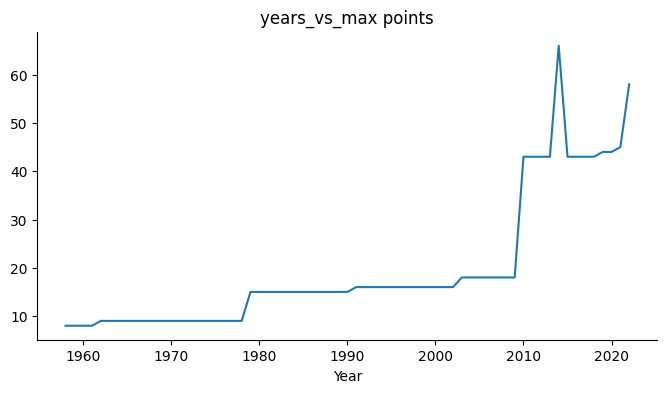

In [31]:
from matplotlib import pyplot as plt
years_vs_max_points['years_vs_max_points'].plot(kind='line', figsize=(8, 4), title='years_vs_max points')
plt.gca().spines[['top', 'right']].set_visible(False)

year_with_max_points :  2014 
max_points :  2014


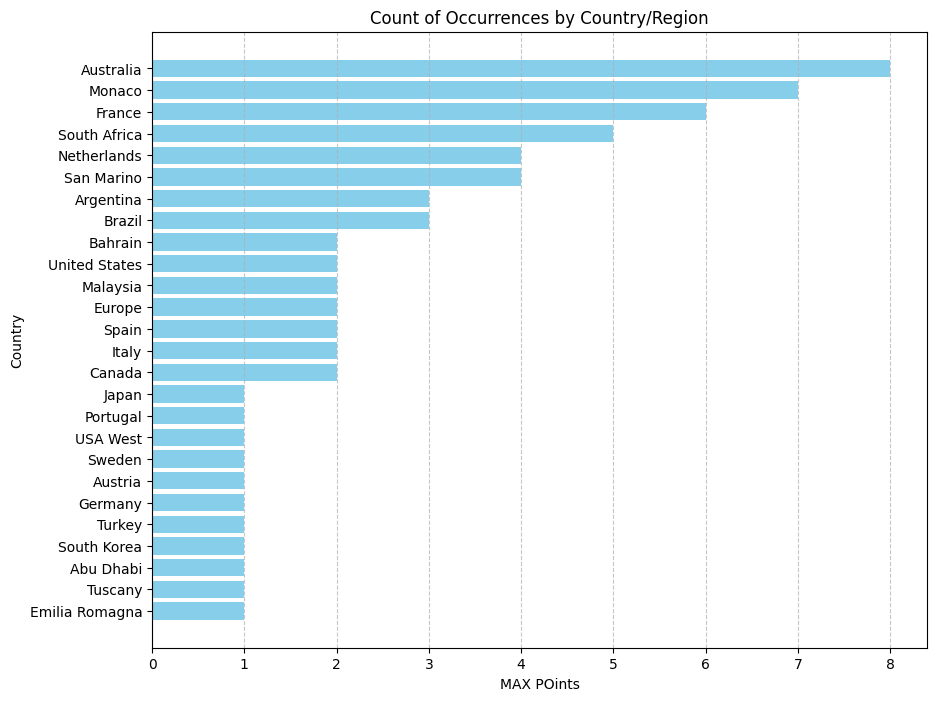

In [32]:
import matplotlib.pyplot as plt

# Find the year with the highest total points
year_with_max_points = max_points_per_year.idxmax()
max_points = max_points_per_year.max()
print("year_with_max_points : ",year_with_max_points,"\nmax_points : ",year_with_max_points)
Year_team_pts=df.loc[df.groupby('Year')['PTS'].idxmax()]
grandpix_wins=Year_team_pts['Grand Prix'].value_counts().to_frame("grandpix_wins")
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(grandpix_wins.index,grandpix_wins['grandpix_wins'], color='skyblue')
plt.xlabel('MAX POints')
plt.ylabel('Country')
plt.title('Count of Occurrences by Country/Region')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Find the year with the highest total points
year_with_max_points = max_points_per_year.idxmax()
max_points = max_points_per_year.max()
print("year_with_max_points : ",year_with_max_points,"\nmax_points : ",year_with_max_points)


year_with_max_points :  2014 
max_points :  2014


In [34]:
grandpix_wins=Year_team_pts['Grand Prix'].value_counts().to_frame("grandpix_wins")

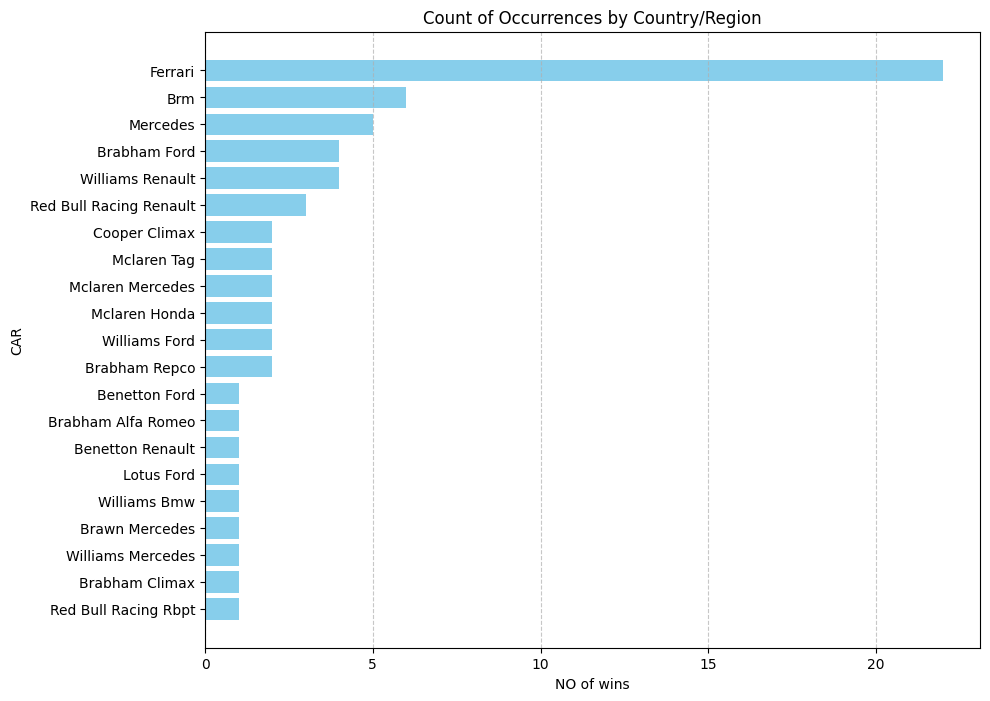

In [35]:
team_wins=Year_team_pts['Team'].value_counts().to_frame("team_wins")
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(team_wins.index,team_wins['team_wins'], color='skyblue')
plt.xlabel('NO of wins')
plt.ylabel('CAR')
plt.title('Count of Occurrences by Country/Region')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ***Race Summeries from 1950-2022***

In [36]:
race_sum=pd.read_csv("/content/drive/MyDrive/BIA DATA/race_summaries.csv")

In [37]:
converted_race_sum=race_sum.copy(deep=True)
# Function to convert time format
def convert_to_timedelta(time_str):
    if pd.isnull(time_str):
        return pd.NaT  # Return NaT (Not a Time) for NaN values

    # Handle cases where time_str is already a Timedelta (for direct conversion)
    if isinstance(time_str, pd.Timedelta):
        return time_str

    # Convert to string if not already
    time_str = str(time_str)

    # Split the string to get minutes and seconds.tenths
    minutes, seconds_and_tenths = time_str.split(':')
    seconds, tenths = seconds_and_tenths.split('.')

    # Calculate total seconds
    total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) / 10

    # Convert to Timedelta
    return pd.to_timedelta(f'{total_seconds} seconds')

# Apply the conversion function to the column
converted_race_sum['race summary Time'] = converted_race_sum['race summary Time'].apply(convert_to_timedelta)

In [38]:
race_sum.dtypes

Grand Prix            object
race Date             object
Winner                object
Car                   object
Laps                 float64
race summary Time     object
WinnerCode            object
Year                   int64
Key                   object
dtype: object

In [39]:

# Function to convert time format to seconds for easier plotting
def convert_to_seconds(time_str):
    if pd.isnull(time_str):
      return None
    minutes, seconds_and_tenths = time_str.split(':')
    seconds, tenths = seconds_and_tenths.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) / 10
    return total_seconds
race_sum['time_seconds'] = race_sum['race summary Time'].apply(convert_to_seconds)

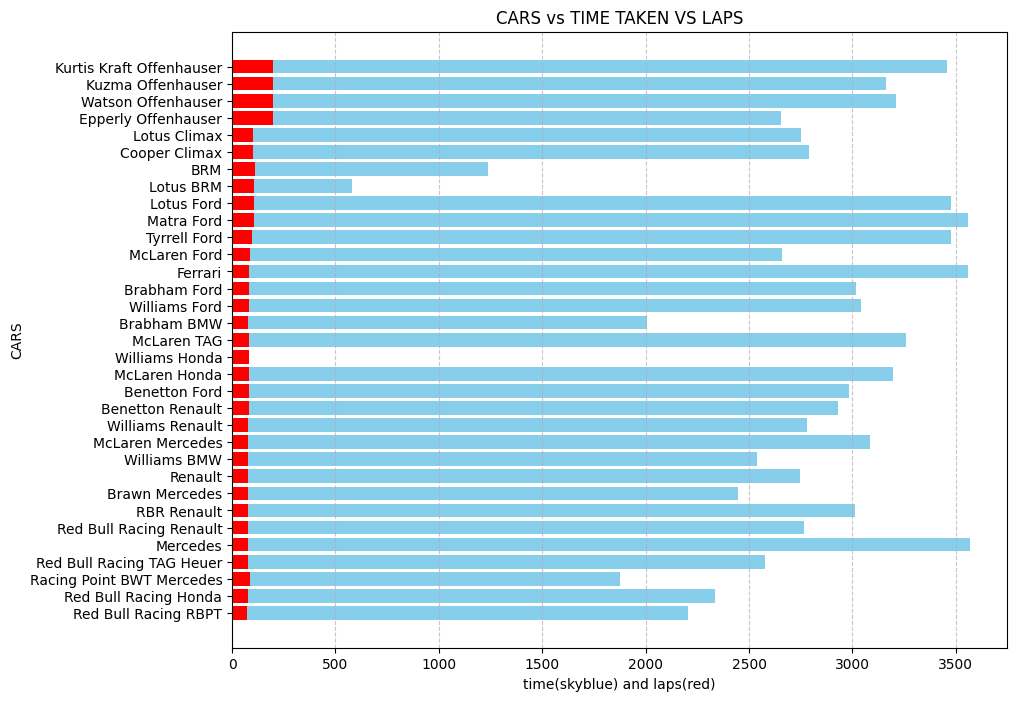

In [40]:

# Group by 'Year' and find the row with maximum 'laps'
max_laps_idx = race_sum.groupby('Year')['Laps'].idxmax()

# Use .loc to get the corresponding 'time_seconds' for the max 'laps'
time_seconds_max_laps = race_sum.loc[max_laps_idx, ['Year', 'time_seconds', 'Laps','Car']].reset_index(drop=True)

time_seconds_max_laps['Laps'].unique()
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(time_seconds_max_laps['Car'],time_seconds_max_laps['time_seconds'], color='skyblue')
plt.barh(time_seconds_max_laps['Car'],time_seconds_max_laps['Laps'], color='red')

plt.xlabel('time(skyblue) and laps(red)')
plt.ylabel('CARS')
plt.title('CARS vs TIME TAKEN VS LAPS')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

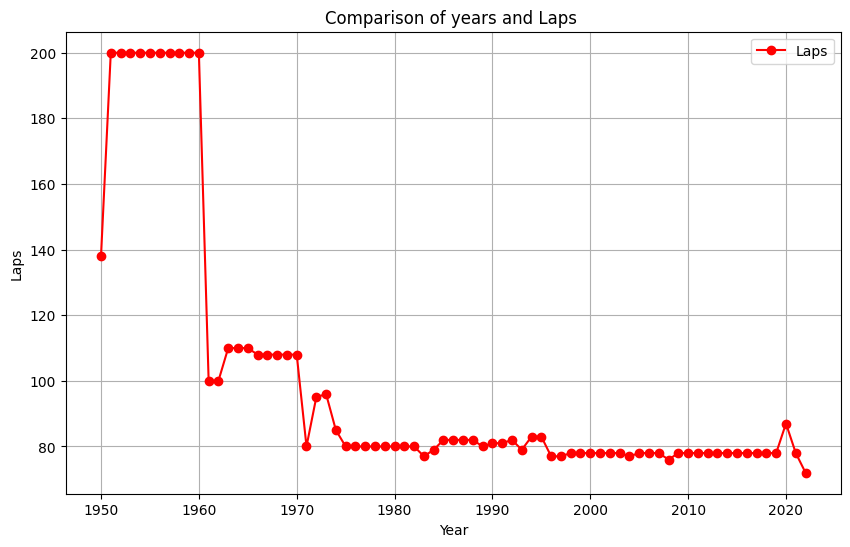

In [41]:


# Plotting
plt.figure(figsize=(10, 6))

# Plot time_seconds
plt.plot(time_seconds_max_laps['Year'], time_seconds_max_laps['Laps'], marker='o', linestyle='-', color='r', label='Laps')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Laps')
plt.title('Comparison of years and Laps ')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [42]:
# Group by 'laps' and find the fastest time for each group
result = race_sum.groupby('Laps').apply(lambda x: x.loc[x['time_seconds'].idxmin()])

# Display the result
myquery=result[['Laps', 'time_seconds', 'Car']]
myquery

,Laps,time_seconds,Car
Laps,,,
1.0,1.0,207.1,Red Bull Racing Honda
12.0,12.0,1755.7,Tyrrell Ford
14.0,14.0,1143.2,Matra Ford
15.0,15.0,355.7,Brabham Repco
18.0,18.0,145.0,Ferrari
20.0,20.0,1383.3,Ferrari
22.0,22.0,1838.3,Maserati
24.0,24.0,2226.3,Vanwall
28.0,28.0,104.0,Red Bull Racing RBPT


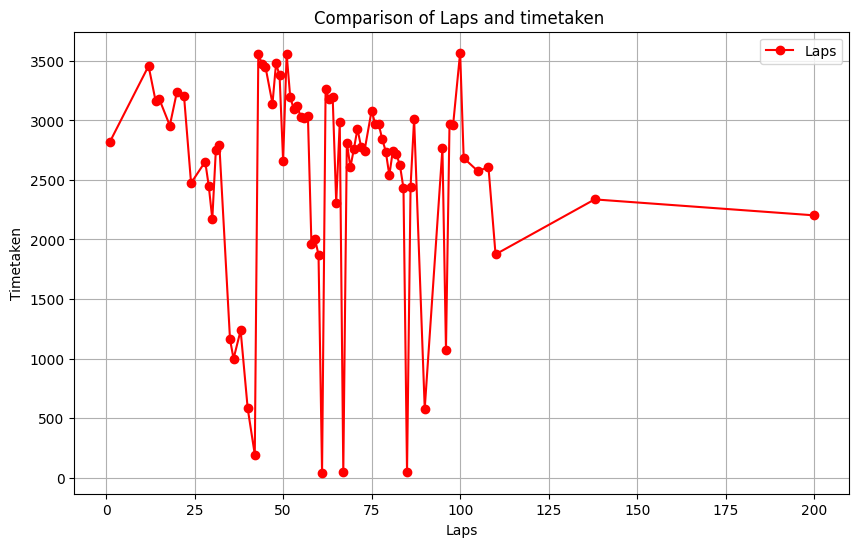

In [43]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot time_seconds
plt.plot(myquery['Laps'], time_seconds_max_laps['time_seconds'], marker='o', linestyle='-', color='r', label='Laps')

# Add labels and title
plt.xlabel('Laps')
plt.ylabel('Timetaken')
plt.title('Comparison of Laps and timetaken ')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

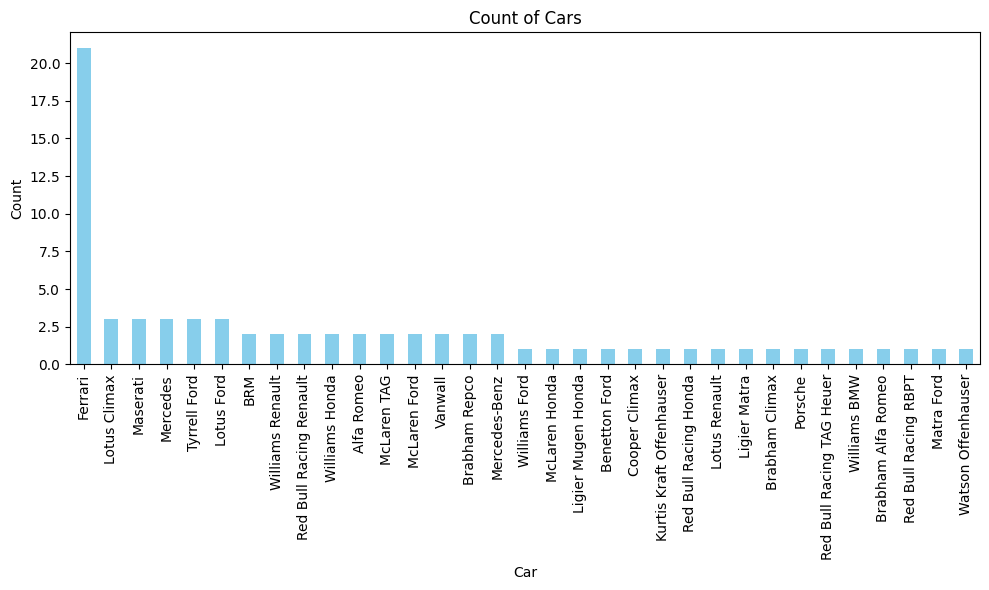

In [44]:
# Count occurrences of each car
car_counts = myquery['Car'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Cars')
plt.xlabel('Car')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
!pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.5 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=f19e08ff4bbec1078cd85e1cc80ebb33792b1babb7da6d931aaa8154faf88beb
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


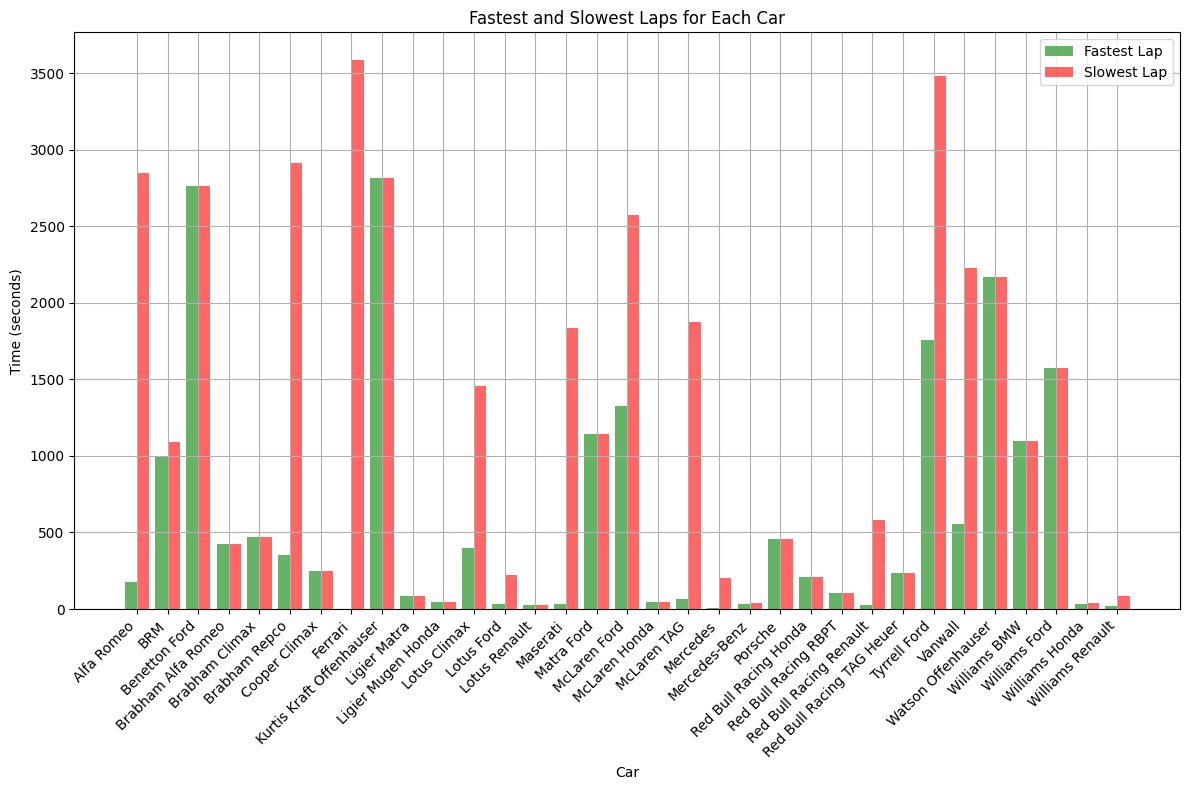

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
# Group by 'Car' to find fastest and slowest laps
fastest_laps = myquery.loc[myquery.groupby('Car')['time_seconds'].idxmin()]
slowest_laps = myquery.loc[myquery.groupby('Car')['time_seconds'].idxmax()]

# Set up plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.4

# X locations for the bars
index = range(len(fastest_laps))

# Plot fastest laps with hover information
bars_fastest = ax.bar(index, fastest_laps['time_seconds'], bar_width, label='Fastest Lap', color='g', alpha=0.6)
mplcursors.cursor(bars_fastest, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Laps: {fastest_laps.iloc[sel.target.index]['Laps']}"))

# Plot slowest laps with hover information
bars_slowest = ax.bar([i + bar_width for i in index], slowest_laps['time_seconds'], bar_width, label='Slowest Lap', color='r', alpha=0.6)
mplcursors.cursor(bars_slowest, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Laps: {slowest_laps.iloc[sel.target.index]['Laps']}"))

# X-axis labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(fastest_laps['Car'], rotation=45, ha='right')

# Labels and title
ax.set_xlabel('Car')
ax.set_ylabel('Time (seconds)')
ax.set_title('Fastest and Slowest Laps for Each Car')
ax.legend()

# Grid lines
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [47]:
sprint_result=pd.read_csv("/content/drive/MyDrive/BIA DATA/sprint_results.csv")
sprint_result

,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Year,Grand Prix,Detail,DriverCode,Key
0,1,33,Max Verstappen,Red Bull Racing Honda,17,25:38.4,3,2021,Great Britain,Sprint-Results,VER,Red Bull Racing Honda-Max Verstappen-Great Bri...
1,2,44,Lewis Hamilton,Mercedes,17,+1.430s,2,2021,Great Britain,Sprint-Results,HAM,Mercedes-Lewis Hamilton-Great Britain-2021
2,3,77,Valtteri Bottas,Mercedes,17,+7.502s,1,2021,Great Britain,Sprint-Results,BOT,Mercedes-Valtteri Bottas-Great Britain-2021
3,4,16,Charles Leclerc,Ferrari,17,+11.278s,0,2021,Great Britain,Sprint-Results,LEC,Ferrari-Charles Leclerc-Great Britain-2021
4,5,4,Lando Norris,McLaren Mercedes,17,+24.111s,0,2021,Great Britain,Sprint-Results,NOR,McLaren Mercedes-Lando Norris-Great Britain-2021
5,6,3,Daniel Ricciardo,McLaren Mercedes,17,+30.959s,0,2021,Great Britain,Sprint-Results,RIC,McLaren Mercedes-Daniel Ricciardo-Great Britai...
6,7,14,Fernando Alonso,Alpine Renault,17,+43.527s,0,2021,Great Britain,Sprint-Results,ALO,Alpine Renault-Fernando Alonso-Great Britain-2021
7,8,5,Sebastian Vettel,Aston Martin Mercedes,17,+44.439s,0,2021,Great Britain,Sprint-Results,VET,Aston Martin Mercedes-Sebastian Vettel-Great B...
8,9,63,George Russell,Williams Mercedes,17,+46.652s,0,2021,Great Britain,Sprint-Results,RUS,Williams Mercedes-George Russell-Great Britain...
9,10,31,Esteban Ocon,Alpine Renault,17,+47.395s,0,2021,Great Britain,Sprint-Results,OCO,Alpine Renault-Esteban Ocon-Great Britain-2021


In [48]:
pos_pts1=sprint_result.groupby('Pos')['PTS'].agg(list).to_frame("PTS")
pos_pts1
pos_pts2=sprint_result.groupby('Pos')['Laps'].agg(list).to_frame("LAPS")
pos_pts2
mymerged=pos_pts2.merge(pos_pts1,left_index=True,right_index=True)
mymerged

,LAPS,PTS
Pos,,
1,"[17, 18, 24, 21, 23, 24]","[3, 3, 3, 8, 8, 8]"
10,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
11,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
12,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
13,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
14,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
15,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
16,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"
17,"[17, 18, 24, 21, 23, 24]","[0, 0, 0, 0, 0, 0]"


In [49]:
fastest_laps=pd.read_csv("/content/drive/MyDrive/BIA DATA/fastest_laps.csv")
fastest_laps

,Grand Prix,Driver,Car,Time,DriverCode,Year,Key
0,Great Britain,Nino Farina,Alfa Romeo,01:50.6,FAR,1950,Alfa Romeo-Nino Farina-Great Britain-1950
1,Monaco,Juan Manuel Fangio,Alfa Romeo,01:51.0,FAN,1950,Alfa Romeo-Juan Manuel Fangio-Monaco-1950
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,NaN,PAR,1950,Kurtis Kraft Offenhauser-Johnnie Parsons-India...
3,Switzerland,Nino Farina,Alfa Romeo,02:41.6,FAR,1950,Alfa Romeo-Nino Farina-Switzerland-1950
4,Belgium,Nino Farina,Alfa Romeo,04:34.1,FAR,1950,Alfa Romeo-Nino Farina-Belgium-1950
5,France,Juan Manuel Fangio,Alfa Romeo,02:35.6,FAN,1950,Alfa Romeo-Juan Manuel Fangio-France-1950
6,Italy,Juan Manuel Fangio,Alfa Romeo,02:00.0,FAN,1950,Alfa Romeo-Juan Manuel Fangio-Italy-1950
7,Switzerland,Juan Manuel Fangio,Alfa Romeo,02:51.1,FAN,1951,Alfa Romeo-Juan Manuel Fangio-Switzerland-1951
8,Indianapolis 500,Lee Wallard,Kurtis Kraft Offenhauser,01:07.3,WAL,1951,Kurtis Kraft Offenhauser-Lee Wallard-Indianapo...
9,Belgium,Juan Manuel Fangio,Alfa Romeo,04:22.1,FAN,1951,Alfa Romeo-Juan Manuel Fangio-Belgium-1951


In [50]:
import numpy as np
# Function to convert time format to seconds for easier plotting
# Function to convert time string to seconds
def convert_to_seconds(time_str):
    if isinstance(time_str, str):
        try:
            # Split the string to get minutes and seconds.tenths
            minutes, seconds_and_tenths = time_str.split(':')
            seconds, tenths = seconds_and_tenths.split('.')

            # Calculate total seconds including tenths
            total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) / 10

            return total_seconds

        except ValueError:
            return np.nan  # Return NaN for invalid or missing data

    return np.nan  # Return NaN if time_str is not a string

fastest_laps['time_seconds'] = fastest_laps['Time'].apply(convert_to_seconds)

In [51]:
mean=fastest_laps.groupby('Car')['time_seconds'].mean()
max=fastest_laps.groupby('Car')['time_seconds'].max()
min=fastest_laps.groupby('Car')['time_seconds'].min()
mean=mean.to_frame("mean")
max=max.to_frame("max")
min=min.to_frame("min")
mergedvalues=mean.merge(max,left_index=True,right_index=True).merge(min,left_index=True,right_index=True)
mergedvalues

,mean,max,min
Car,,,
Alfa Romeo,185.328571,595.8,104.0
Alfa Romeo Ferrari,104.400000,104.4,104.4
AlphaTauri Honda,78.400000,78.4,78.4
BRM,140.957143,612.2,71.9
BRM Climax,117.800000,117.8,117.8
Benetton BMW,94.700000,106.6,88.1
Benetton Ford,88.363158,123.0,74.0
Benetton Playlife,88.200000,88.2,88.2
Benetton Renault,91.661538,113.1,76.4


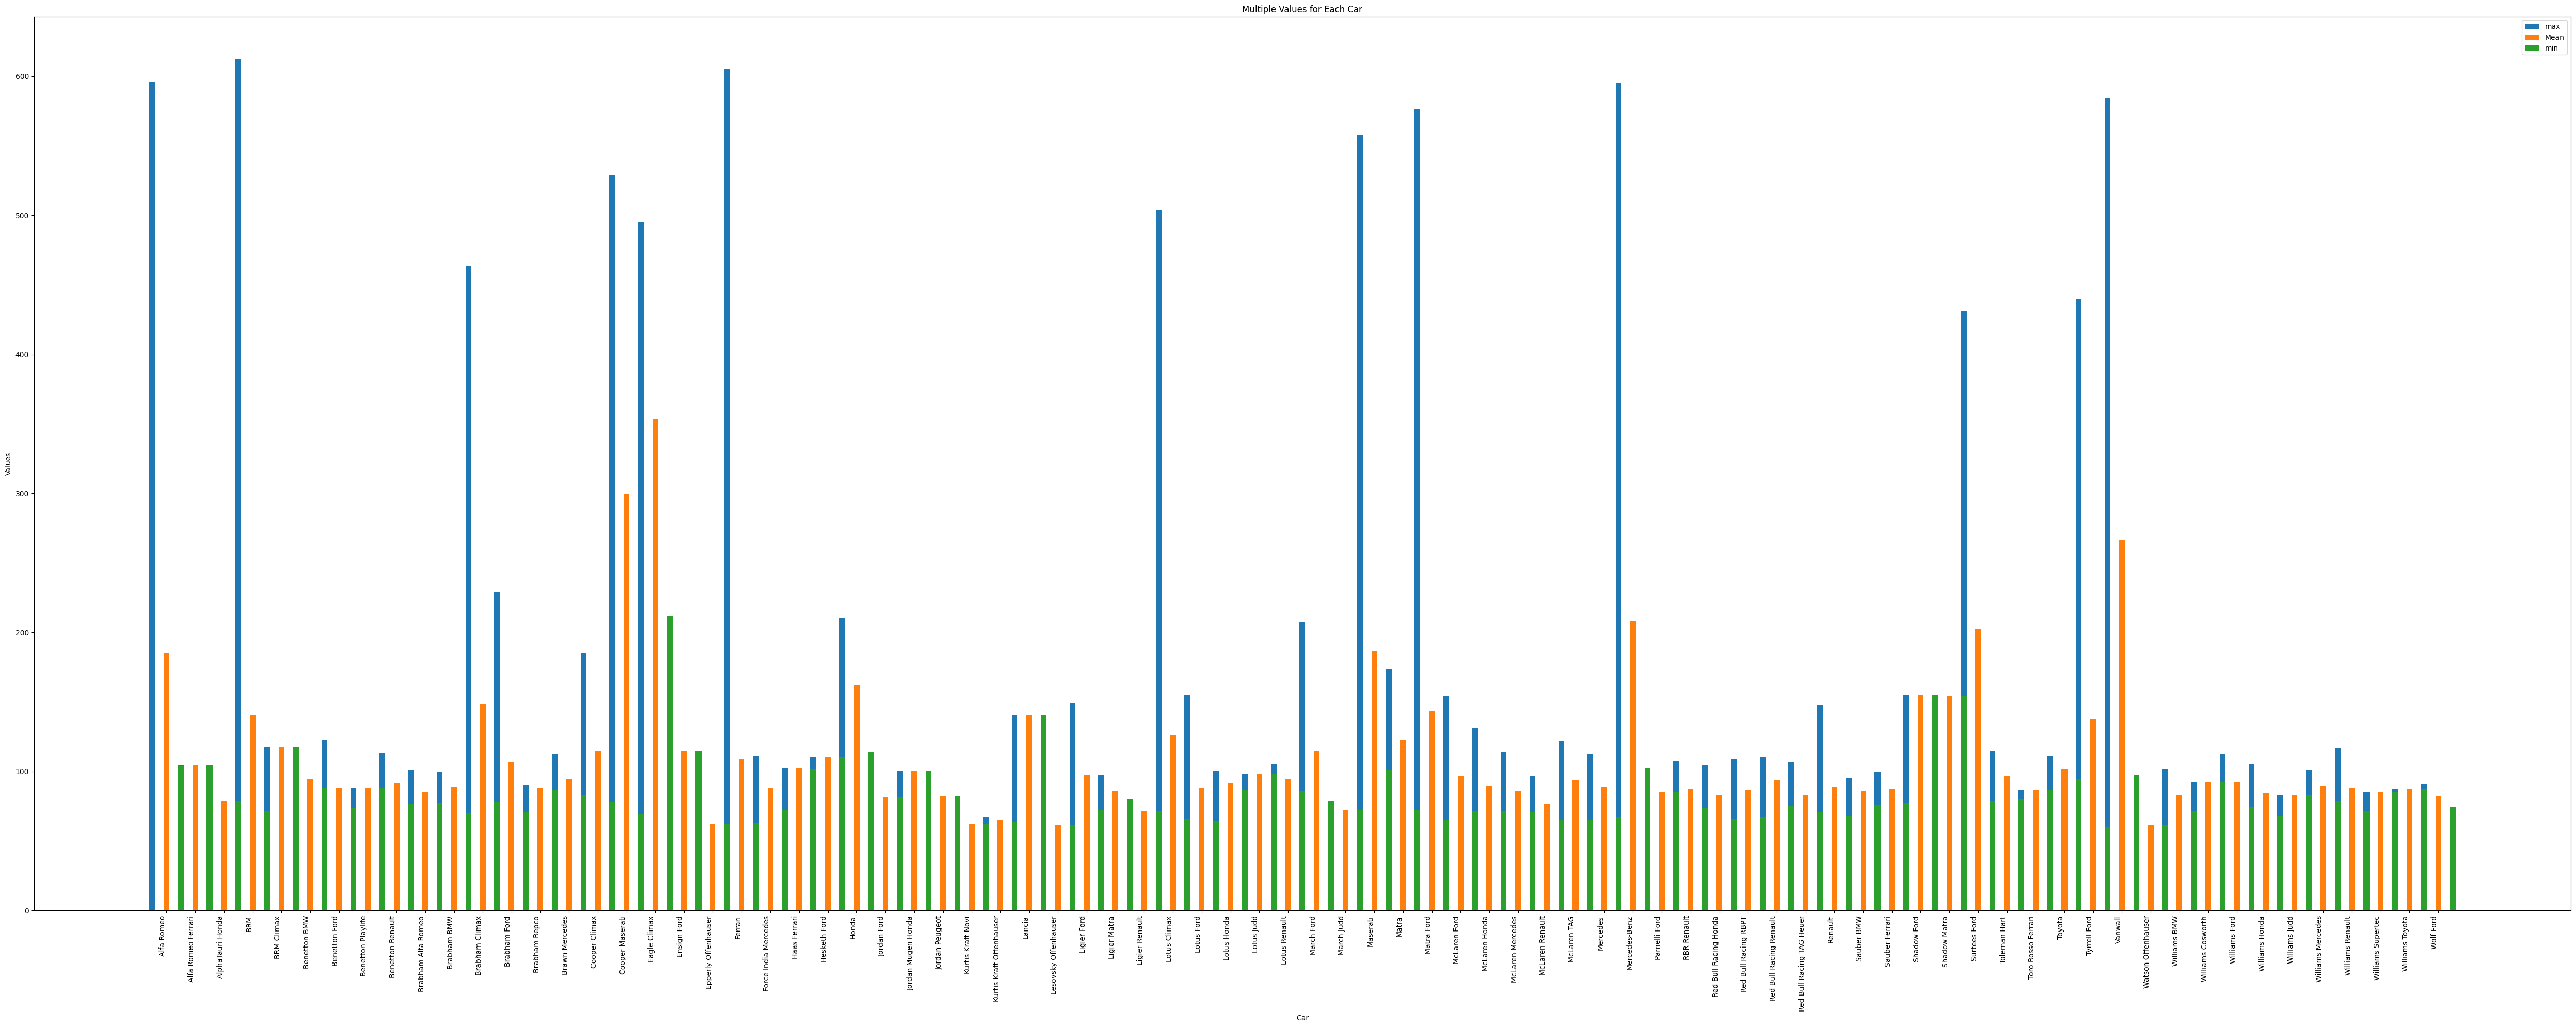

In [52]:
fig, ax = plt.subplots(figsize=(50, 20))  # Adjust figsize as needed

# Define positions and width for bars
positions = np.arange(len(mergedvalues.index))
width = 0.2  # Adjust width as needed
space = 0.3  # Adjust space between groups
# Plotting bars for each value
ax.bar(positions - width - space, mergedvalues['max'], width, label='max')
ax.bar(positions, mergedvalues['mean'], width, label='Mean')
ax.bar(positions + width+space, mergedvalues['min'], width, label='min')

# Adding labels and title
ax.set_xlabel('Car')
ax.set_ylabel('Values')
ax.set_title('Multiple Values for Each Car')
ax.set_xticks(positions)
ax.set_xticklabels(mergedvalues.index, rotation=90, ha='right')  # Rotating x-axis labels for better readability
ax.legend()
mplcursors.cursor(hover=True)

# Show plot
plt.tight_layout()
plt.show()

# **DATA TANSFORMATION**

In [53]:
# Function to convert time format to seconds for easier plotting
# Function to convert time string to seconds
def convert_to_seconds(time_str):
    if isinstance(time_str, str):
        try:
            # Split the string to get minutes and seconds.tenths
            minutes, seconds_and_tenths = time_str.split(':')
            seconds, tenths = seconds_and_tenths.split('.')

            # Calculate total seconds including tenths
            total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) / 10

            return total_seconds

        except ValueError:
            return np.nan  # Return NaN for invalid or missing data

    return np.nan  # Return NaN if time_str is not a string

df6['Practice_Time_seconds'] = df6['Practice Time'].apply(convert_to_seconds)
df6['startgrid_Time_seconds']=df6['startgrid Time'].apply(convert_to_seconds)
df6['Time_taken_in_fast_laps_seconds']=df6['Time taken in fast laps'].apply(convert_to_seconds)
df6['qualifying_Time	_seconds']=df6['qualifying Time'].apply(convert_to_seconds)

In [54]:
# Convert to datetime format
df6['Pitstop Time of day '] = pd.to_datetime(df6['Pitstop Time of day '], format='%H:%M:%S')

# Extract hour, minute, second if needed
df6['Pitstop Hour '] = df6['Pitstop Time of day '].dt.hour
df6['Pitstop Minute'] = df6['Pitstop Time of day '].dt.minute
df6['Pitstop Second'] = df6['Pitstop Time of day '].dt.second

# Example: Calculate time difference between consecutive pitstops
df6['Time Difference'] = df6['Pitstop Time of day '].diff().dt.total_seconds()

In [55]:
def convert_to_seconds(time_str):
    if 'lap' in time_str:
        return None  # Or handle lap counts differently if needed
    elif 'DNF' in time_str:
        return None  # Or handle DNF (Did Not Finish) differently
    else:
        try:
            return float(time_str.rstrip('s').lstrip('+'))
        except ValueError:
            return None  # Handle any other unexpected formats

df6['Race Time/Retired'] = df6['Race Time/Retired '].apply(convert_to_seconds)

def is_lap_count(time_str):
    return 'lap' in time_str

df6['Lap Count'] = df6['Race Time/Retired '].apply(is_lap_count)

def is_dnf(time_str):
    return 'DNF' in time_str

df6['DNF'] = df6['Race Time/Retired '].apply(is_dnf).astype(int)



In [56]:
df6.columns

Index(['Date', 'driver PTS', 'driver  Position', 'Key', 'Pos', 'No_x',
       'Driver_y', 'Car_y', 'Race Laps', 'Race Time/Retired ', 'Race points',
       'Year_y', 'Grand Prix_y', 'Detail_y', 'DriverCode_y', 'startgrid No',
       'startgrid Pos', 'startgrid Time', 'Car_y', 'Practice Detail',
       'Driver_y', 'Gap', 'Grand Prix_y', 'Practice Laps', 'Practice No',
       'Practice Pos', 'Practice Time', 'Year_y', 'Avg Speed', 'Car_x',
       'Detail_x', 'Driver_x', 'DriverCode_y', 'Grand Prix_x',
       'no of fast Lap ', 'fastlaps no', 'fastlaps Pos ',
       'Time taken in fast laps', 'Time of day', 'Year_x', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Stops', 'No_y', 'Driver_y', 'Car_y', 'pitstop Lap',
       'Pitstop Time of day ', 'Pitstop Total time ', 'Year_y', 'Grand Prix_y',
       'Detail_y', 'DriverCode_x', 'Car', 'Detail', 'Driver', 'DriverCode_y',
       'Grand Prix', 'qualifying Laps', 'qualifying No', 'quali

In [57]:
df6.drop(['Grand Prix_x', 'Car_x', 'Detail_x', 'Year_x', 'Driver_x','qualifying Q1',
       'qualifying Q2', 'qualifying Q3','Time of day', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Car_y','Grand Prix_y','Year_y','No_y','Detail_y','startgrid Time','qualifying Time','Time taken in fast laps','Practice Time','Race Time/Retired '], axis=1, inplace=True)

In [58]:
columns_to_keep = [
    'Date', 'Car','driver PTS','driver  Position','Grand Prix', 'Year','Pos', 'Race Laps', 'Race points',
    'Driver', 'DriverCode_x', 'driver PTS', 'driver  Position', 'Avg Speed', 'Practice Laps','Practice Pos','no of fast Lap ',
    'startgrid No', 'startgrid Pos', 'qualifying Pos', 'qualifying Laps',
    'Stops', 'Practice_Time_seconds', 'startgrid_Time_seconds',
       'Time_taken_in_fast_laps_seconds',  'Lap Count', 'DNF', 'Pitstop Hour ',
       'Pitstop Minute', 'Pitstop Second'
]

# Select only the columns you need
df6_selected = df6[columns_to_keep]

print(df6_selected.head())  # Display the first few rows to verify


        Date           Car  driver PTS driver  Position Grand Prix  Year Pos  \
0  17-Apr-94  Minardi Ford         0.0              DNF    Pacific  1994  NC   
1  17-Apr-94  Minardi Ford         0.0              DNF    Pacific  1994  NC   
2  17-Apr-94  Minardi Ford         0.0              DNF    Pacific  1994  NC   
3  17-Apr-94  Minardi Ford         0.0              DNF    Pacific  1994  NC   
4  17-Apr-94  Minardi Ford         0.0              DNF    Pacific  1994  NC   

   Race Laps  Race points            Driver DriverCode_x  driver PTS  \
0       69.0          0.0  Michele Alboreto          ALB         0.0   
1       69.0          0.0  Michele Alboreto          ALB         0.0   
2       69.0          0.0  Michele Alboreto          ALB         0.0   
3       69.0          0.0  Michele Alboreto          ALB         0.0   
4       69.0          0.0  Michele Alboreto          ALB         0.0   

  driver  Position  Avg Speed  Practice Laps  Practice Pos  no of fast Lap   \
0      

In [59]:
# Calculate average 'Avg Speed' for each driver
driver_avg_speed = df6.groupby('Car')['Avg Speed'].mean()

# Fill NaN values in 'Avg Speed' based on driver average
df6['Avg Speed'] = df6.apply(lambda row: driver_avg_speed[row['Car']] if pd.isna(row['Avg Speed']) else row['Avg Speed'], axis=1)


In [60]:
nan_count = df6_selected['Avg Speed'].isna().sum()
nan_count

2916

In [61]:
df6_selected.dropna(inplace=True)

<ipython-input-61-9f600063bb99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_selected.dropna(inplace=True)


<Axes: >

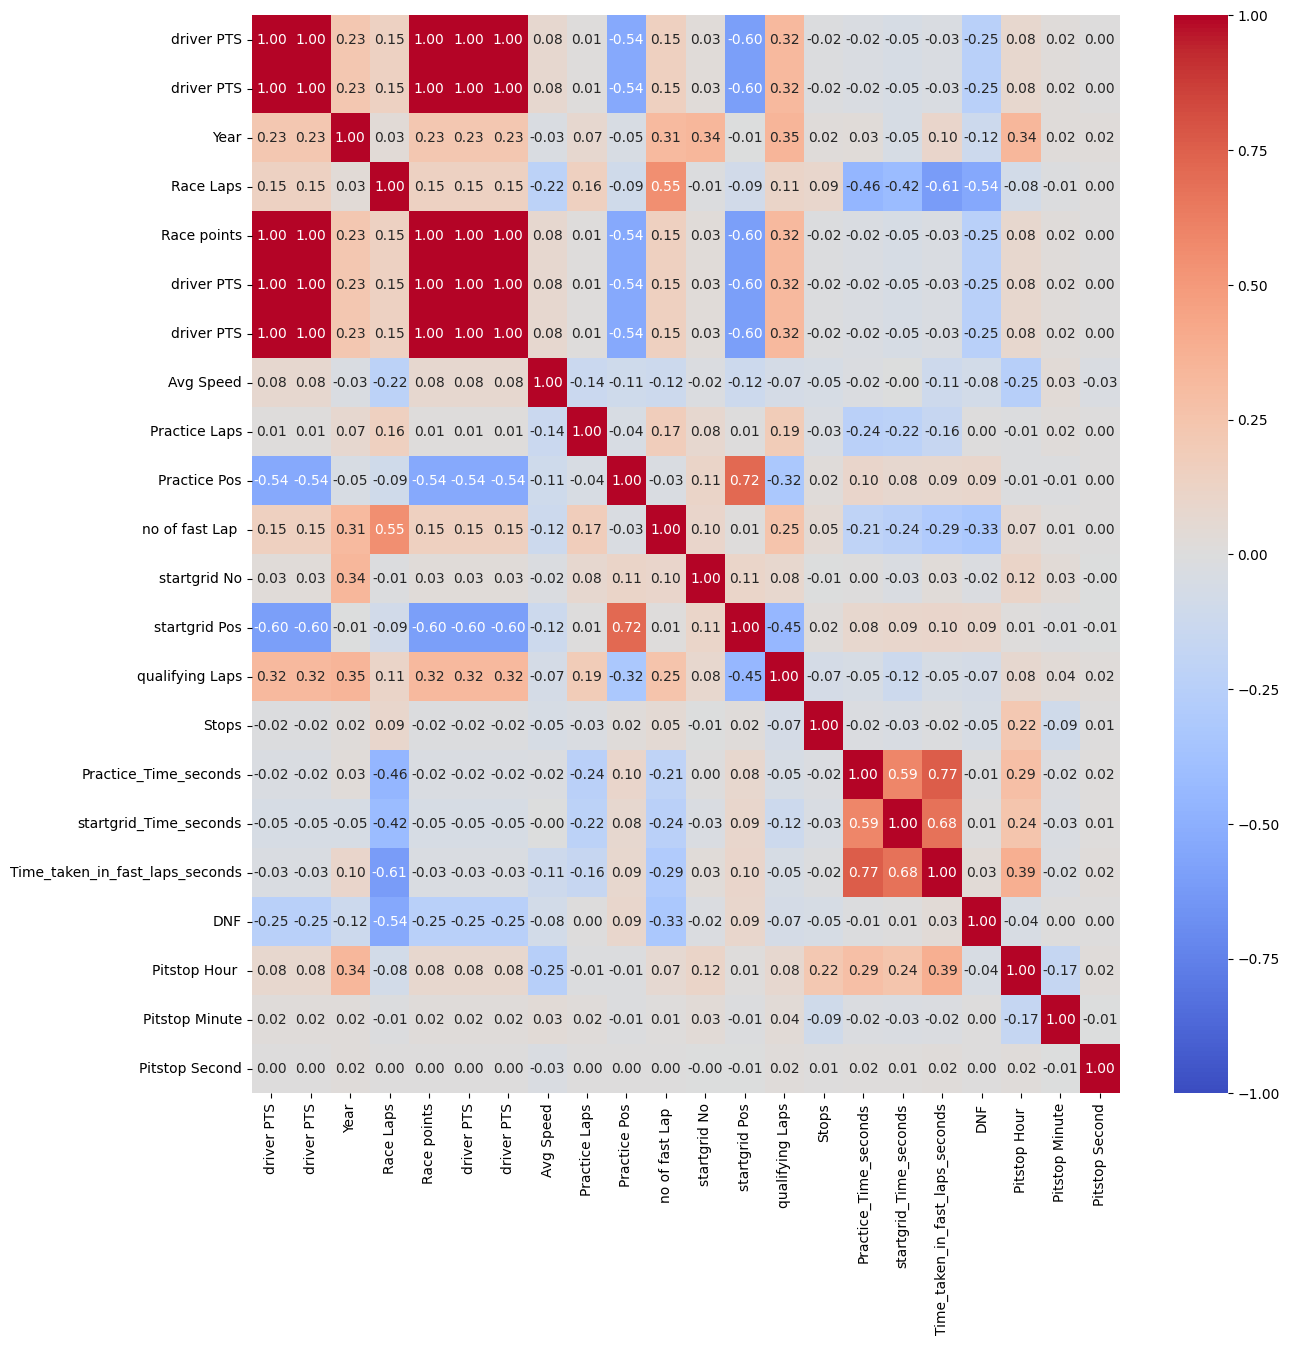

In [62]:
#feature selection
# Identify numeric columns (excluding string columns)
numeric_columns = df6_selected.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df6_selected[numeric_columns].corr()
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Generate a heatmap with the numeric correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)



In [63]:
df6_selected.describe()

,driver PTS,Year,Race Laps,Race points,driver PTS,Avg Speed,Practice Laps,Practice Pos,no of fast Lap,startgrid No,startgrid Pos,qualifying Laps,Stops,Practice_Time_seconds,startgrid_Time_seconds,Time_taken_in_fast_laps_seconds,DNF,Pitstop Hour,Pitstop Minute,Pitstop Second
count,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000,47428.000000
mean,4.155699,2012.399595,57.834591,4.155699,4.155699,202.643335,21.993738,10.742599,43.297335,18.163595,10.523551,13.326263,1.702686,89.401697,89.236354,90.483303,0.128553,15.149321,27.661381,29.616640
std,6.433671,7.043957,11.660108,6.433671,6.433671,19.596900,8.993354,6.182440,15.888596,18.388222,6.083317,6.182460,0.849833,14.297976,15.692645,12.025733,0.334708,1.674522,16.746512,17.237539
min,0.000000,1998.000000,2.000000,0.000000,0.000000,91.610000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,63.700000,62.900000,65.600000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,2007.000000,53.000000,0.000000,0.000000,192.951000,16.000000,5.000000,34.000000,6.000000,5.000000,9.000000,1.000000,79.300000,78.500000,80.700000,0.000000,14.000000,13.000000,15.000000
50%,0.000000,2013.000000,57.000000,0.000000,0.000000,202.871000,21.000000,11.000000,46.000000,14.000000,10.000000,12.000000,2.000000,88.200000,87.100000,88.900000,0.000000,15.000000,27.000000,30.000000
75%,6.000000,2019.000000,67.000000,6.000000,6.000000,213.899000,28.000000,16.000000,54.000000,21.000000,16.000000,18.000000,2.000000,97.700000,96.700000,99.300000,0.000000,16.000000,41.000000,44.000000
max,50.000000,2022.000000,78.000000,50.000000,50.000000,257.320000,56.000000,29.000000,78.000000,99.000000,24.000000,35.000000,6.000000,1100.600000,208.400000,202.300000,1.000000,22.000000,59.000000,59.000000


In [64]:
df6.head(1)

,Date,driver PTS,driver Position,Key,Pos,No_x,Driver_y,Race Laps,Race points,DriverCode_y,startgrid No,startgrid Pos,Practice Detail,Driver_y,Gap,Practice Laps,Practice No,Practice Pos,Avg Speed,DriverCode_y,no of fast Lap,fastlaps no,fastlaps Pos,Stops,Driver_y,pitstop Lap,Pitstop Time of day,Pitstop Total time,DriverCode_x,Car,Detail,Driver,DriverCode_y,Grand Prix,qualifying Laps,qualifying No,qualifying Pos,Year,Practice_Time_seconds,startgrid_Time_seconds,Time_taken_in_fast_laps_seconds,qualifying_Time\t_seconds,Pitstop Hour,Pitstop Minute,Pitstop Second,Time Difference,Race Time/Retired,Lap Count,DNF
0,17-Apr-94,0.0,DNF,Minardi Ford-Michele Alboreto-Pacific-1994,NC,24,Michele Alboreto,69.0,0.0,ALB,24,15,Practice-2,Michele Alboreto,+2.165s,21.0,24,11,193.997807,ALB,44.0,24,7,1,Michele Alboreto,19,1900-01-01 14:24:39,27.693,ALB,Minardi Ford,Qualifying,Michele Alboreto,ALB,Pacific,20.0,24,15,1994,74.0,73.0,76.0,73.0,14,24,39,NaN,NaN,False,1


In [65]:
df6_selected.drop(['Date','Car','Driver','driver  Position','Grand Prix','DriverCode_x','qualifying Pos','driver PTS'], axis=1, inplace=True)

<ipython-input-65-9fe9e0c1f684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_selected.drop(['Date','Car','Driver','driver  Position','Grand Prix','DriverCode_x','qualifying Pos','driver PTS'], axis=1, inplace=True)


In [66]:
df6_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47428 entries, 2916 to 53990
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             47428 non-null  int64  
 1   Pos                              47428 non-null  object 
 2   Race Laps                        47428 non-null  float64
 3   Race points                      47428 non-null  float64
 4   Avg Speed                        47428 non-null  float64
 5   Practice Laps                    47428 non-null  float64
 6   Practice Pos                     47428 non-null  int64  
 7   no of fast Lap                   47428 non-null  float64
 8   startgrid No                     47428 non-null  int64  
 9   startgrid Pos                    47428 non-null  int64  
 10  qualifying Laps                  47428 non-null  float64
 11  Stops                            47428 non-null  int64  
 12  Practice_Time_second

In [67]:
df6_selected.columns

Index(['Year', 'Pos', 'Race Laps', 'Race points', 'Avg Speed', 'Practice Laps',
       'Practice Pos', 'no of fast Lap ', 'startgrid No', 'startgrid Pos',
       'qualifying Laps', 'Stops', 'Practice_Time_seconds',
       'startgrid_Time_seconds', 'Time_taken_in_fast_laps_seconds',
       'Lap Count', 'DNF', 'Pitstop Hour ', 'Pitstop Minute',
       'Pitstop Second'],
      dtype='object')

In [68]:
df6_selected.head(5)

,Year,Pos,Race Laps,Race points,Avg Speed,Practice Laps,Practice Pos,no of fast Lap,startgrid No,startgrid Pos,qualifying Laps,Stops,Practice_Time_seconds,startgrid_Time_seconds,Time_taken_in_fast_laps_seconds,Lap Count,DNF,Pitstop Hour,Pitstop Minute,Pitstop Second
2916,1998,NC,41.0,0.0,201.214,26.0,9,28.0,14,12,11.0,1,92.5,93.2,94.9,False,1,14,50,39
2917,1998,NC,41.0,0.0,201.214,9.0,8,28.0,14,12,11.0,1,96.1,93.2,94.9,False,1,14,50,39
2918,1998,9,71.0,0.0,191.647,17.0,13,63.0,14,15,12.0,1,79.7,79.4,80.6,True,0,14,0,50
2919,1998,9,71.0,0.0,191.647,42.0,9,63.0,14,15,12.0,1,80.0,79.4,80.6,True,0,14,0,50
2920,1998,5,72.0,2.0,172.274,30.0,7,44.0,14,11,11.0,1,89.2,87.8,89.0,False,0,13,43,52


In [69]:
df6_selected['Pos'].unique()

array(['NC', '9', '5', '6', '10', '12', '7', '3', '11', '2', '1', '14',
       '8', '4', '13', '17', '15', '16', '18', '19', '20', '21', '22',
       '23', '24', 'DQ', 'EX'], dtype=object)

In [70]:
def position_tranformation(time_str):
    if 'NC' in time_str:
      return 0
    elif 'DQ' in time_str:
      return 0
    elif 'EX' in time_str:
      return 0
    else:
      return int(time_str)

df6_selected['Pos']=df6_selected['Pos'].apply(position_tranformation)

<ipython-input-70-395b839909df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_selected['Pos']=df6_selected['Pos'].apply(position_tranformation)


In [71]:
df6_selected.dtypes

Year                                 int64
Pos                                  int64
Race Laps                          float64
Race points                        float64
Avg Speed                          float64
Practice Laps                      float64
Practice Pos                         int64
no of fast Lap                     float64
startgrid No                         int64
startgrid Pos                        int64
qualifying Laps                    float64
Stops                                int64
Practice_Time_seconds              float64
startgrid_Time_seconds             float64
Time_taken_in_fast_laps_seconds    float64
Lap Count                             bool
DNF                                  int64
Pitstop Hour                         int32
Pitstop Minute                       int32
Pitstop Second                       int32
dtype: object

In [72]:
df6_selected.drop(['Year'], axis=1, inplace=True)

<ipython-input-72-c8b1ee70a26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_selected.drop(['Year'], axis=1, inplace=True)


<Axes: >

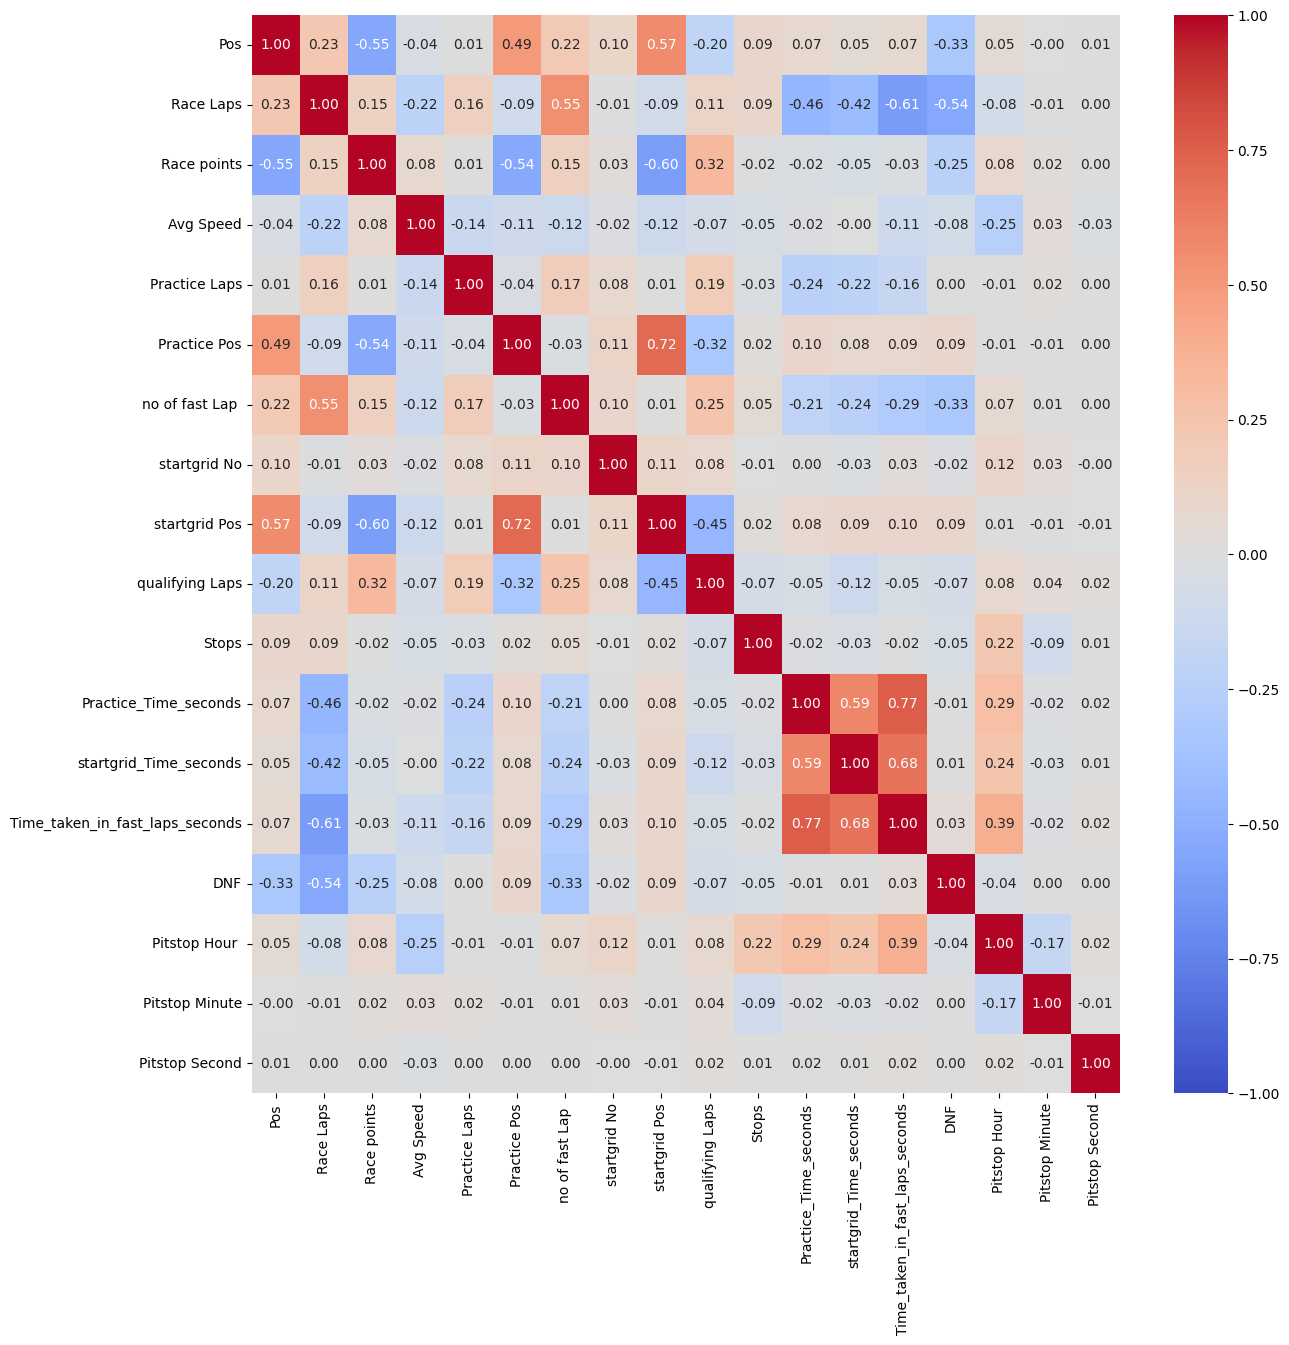

In [73]:
#feature selection
# Identify numeric columns (excluding string columns)
numeric_columns = df6_selected.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df6_selected[numeric_columns].corr()
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Generate a heatmap with the numeric correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)



MODEL BUILDING

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Standardize the features for Logistic Regression
scaler = StandardScaler()
X = df6_selected.drop('Pos', axis=1)
y=df6_selected['Pos']
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Predictions
logreg_predictions = logreg_model.predict(X_test)

# Accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

In [79]:
logreg_accuracy

0.36348302761965

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9918827746152225


In [81]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, rf_predictions)

# Print the report which includes F1-score
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       971
           1       1.00      1.00      1.00       552
           2       1.00      1.00      1.00       487
           3       1.00      1.00      1.00       504
           4       1.00      1.00      1.00       536
           5       1.00      0.98      0.99       494
           6       1.00      1.00      1.00       502
           7       1.00      0.99      0.99       514
           8       0.99      1.00      0.99       475
           9       0.98      1.00      0.99       448
          10       0.99      0.99      0.99       523
          11       0.98      0.99      0.99       462
          12       0.99      0.97      0.98       477
          13       0.97      0.98      0.98       503
          14       0.97      0.99      0.98       448
          15       0.99      0.98      0.99       424
          16       0.99      0.98      0.98       340
          17       0.99    

In [84]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (ground truth labels) and y_pred (model predictions)

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Print the confusion matrix
print(cm)


[[971   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 551   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 487   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 502   0   1   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 535   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 486   1   0   0   7   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 501   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 510   2   1   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 474   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 447   0   0   0   0   0   0   1   0
    0   0   0   0

In [85]:
df6_selected.to_csv("download.csv")

In [86]:
predictions = rf_model.predict(np.array([[41, 2, 200, 26,9,28,14,12,11,1,92.5,93.5,98.6,0,1,12,50,59]]))
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
predictions[0]

0

In [88]:
# save
import joblib
joblib.dump(rf_model, "my_random_forest.joblib")
# load
loaded_rf = joblib.load("/content/my_random_forest.joblib")

# ***PREDICTING THE POSITION BASED VARIOUS TESTDATA***

In [89]:
print(rf_model.predict(np.array([[41, 0, 201.214, 26, 9, 28, 14, 12, 11, 1, 92, 93.2, 94.9, 1, 1, 14, 50, 39]])))
print(rf_model.predict(np.array([[41, 0, 201.214, 9, 8, 28, 14, 12, 11, 1, 96.1, 93.2, 94.9, 1, 1, 14, 50, 39 ]])))
print(rf_model.predict(np.array([[71, 0, 191.647, 17, 13, 63, 14, 15, 12, 1, 79.7, 79.4, 80.6, 1, 0, 14, 0, 50]])))
print(rf_model.predict(np.array([[71, 0, 191.647, 42, 9, 63, 14, 15, 12, 1, 80, 79.4, 80.6, 1, 0, 14, 0, 50] ])))
print(rf_model.predict(np.array([[72, 2, 172.274, 30, 7, 44, 14, 11, 11, 1, 89.2, 87.8, 89, 0, 0, 13, 43, 52 ]])))
print(rf_model.predict(np.array([[72, 2, 172.274, 30, 7, 44, 14, 11, 11, 2, 89.2, 87.8, 89, 0, 0, 14, 18, 48 ]])))
print(rf_model.predict(np.array([[72, 2, 172.274, 14, 10, 44, 14, 11, 11, 1, 90.9, 87.8, 89, 0, 0, 13, 43, 52 ]])))
print(rf_model.predict(np.array([[72, 2, 172.274, 14, 10, 44, 14, 11, 11, 2, 90.9, 87.8, 89, 0, 0, 14, 18, 48 ]])))
print(rf_model.predict(np.array([[61, 1, 196.346, 26, 11, 23, 14, 12, 11, 1, 87.9, 88.2, 90.4, 1, 0, 14, 36, 55 ]])))
print(rf_model.predict(np.array([[61, 1, 196.346, 26, 11, 23, 14, 12, 11, 2, 87.9, 88.2, 90.4, 1, 0, 15, 4, 41 ]])))
print(rf_model.predict(np.array([[61, 1, 196.346, 30, 11, 23, 14, 12, 11, 1, 89.5, 88.2, 90.4, 1, 0, 14, 36, 55 ]])))
print(rf_model.predict(np.array([[61, 1, 196.346, 30, 11, 23, 14, 12, 11, 2, 89.5, 88.2, 90.4, 1, 0, 15, 4, 41 ]])))
print(rf_model.predict(np.array([[63, 0, 198.683, 27, 13, 31, 14, 14, 11, 1, 83.4, 83.3, 85.7, 1, 0, 14, 38, 32 ]])))
print(rf_model.predict(np.array([[63, 0, 198.683, 27, 13, 31, 14, 14, 11, 2, 83.4, 83.3, 85.7, 1, 0, 14, 53, 18 ]])))
print(rf_model.predict(np.array([[63, 0, 198.683, 4, 9, 31, 14, 14, 11, 1, 84.3, 83.3, 85.7, 1, 0, 14, 38, 32 ]])))
print(rf_model.predict(np.array([[63, 0, 198.683, 4, 9, 31, 14, 14, 11, 2, 84.3, 83.3, 85.7, 1, 0, 14, 53, 18 ]])))
print(rf_model.predict(np.array([[72, 0, 143.379, 20, 11, 51, 14, 11, 12, 1, 83.8, 82.3, 84.5, 0, 1, 15, 16, 2] ])))
print(rf_model.predict(np.array([[72, 0, 143.379, 20, 11, 51, 14, 11, 12, 2, 83.8, 82.3, 84.5, 0, 1, 15, 52, 3 ]])))
print(rf_model.predict(np.array([[72, 0, 143.379, 35, 12, 51, 14, 11, 12, 1, 84.9, 82.3, 84.5, 0, 1, 15, 16, 2 ]])))
print(rf_model.predict(np.array([[72, 0, 143.379, 35, 12, 51, 14, 11, 12, 2, 84.9, 82.3, 84.5, 0, 1, 15, 52, 3 ]])))
print(rf_model.predict(np.array([[70, 0, 192.066, 4, 20, 46, 14, 11, 12, 1, 78.9, 76.6, 79.7, 1, 0, 14, 41, 20 ]])))
print(rf_model.predict(np.array([[70, 0, 192.066, 4, 20, 46, 14, 11, 12, 2, 78.9, 76.6, 79.7, 1, 0, 15, 12, 36 ]])))
print(rf_model.predict(np.array([[70, 0, 192.066, 22, 12, 46, 14, 11, 12, 1, 78.2, 76.6, 79.7, 1, 0, 14, 41, 20 ]])))
print(rf_model.predict(np.array([[70, 0, 192.066, 22, 12, 46, 14, 11, 12, 2, 78.2, 76.6, 79.7, 1, 0, 15, 12, 36 ]])))
print(rf_model.predict(np.array([[53, 0, 190.366, 27, 9, 11, 14, 8, 12, 1, 85.8, 85.1, 97.2, 0, 1, 14, 39, 31 ]])))
print(rf_model.predict(np.array([[53, 0, 190.366, 27, 9, 11, 14, 8, 12, 2, 85.8, 85.1, 97.2, 0, 1, 15, 10, 47 ]])))
print(rf_model.predict(np.array([[53, 0, 190.366, 27, 12, 11, 14, 8, 12, 1, 88.1, 85.1, 97.2, 0, 1, 14, 39, 31 ]])))
print(rf_model.predict(np.array([[53, 0, 190.366, 27, 12, 11, 14, 8, 12, 2, 88.1, 85.1, 97.2, 0, 1, 15, 10, 47 ]])))
print(rf_model.predict(np.array([[45, 0, 229.636, 23, 8, 43, 14, 11, 12, 1, 104.4, 103.7, 107, 0, 0, 14, 41, 7 ]])))
print(rf_model.predict(np.array([[45, 0, 229.636, 34, 4, 43, 14, 11, 12, 1, 104.5, 103.7, 107, 0, 0, 14, 41, 7 ]])))
print(rf_model.predict(np.array([[76, 0, 175.581, 26, 11, 35, 14, 11, 12, 1, 79.4, 79.2, 81.4, 1, 0, 14, 44, 31]])))
print(rf_model.predict(np.array([[76, 0, 175.581, 26, 11, 35, 14, 11, 12, 2, 79.4, 79.2, 81.4, 1, 0, 15, 13, 48 ]])))
print(rf_model.predict(np.array([[76, 0, 175.581, 22, 13, 35, 14, 11, 12, 1, 82, 79.2, 81.4, 1, 0, 14, 44, 31]])))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

[0]
[0]
[9]
[9]
[5]
[5]
[5]
[5]
[6]
[6]
[6]
[6]
[10]
[10]
[10]
[10]
[12]
[12]
[12]
[12]
[7]
[7]
[7]
[7]
[0]
[0]
[0]
[0]
[10]
[10]
[7]
[7]
[7]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

# **SAVING THE MODEL STATE**

In [90]:
loaded_rf = joblib.load("/content/my_random_forest.joblib")

In [91]:
print(loaded_rf.predict(np.array([[41, 0, 201.214, 26, 9, 28, 14, 12, 11, 1, 92, 93.2, 94.9, 1, 1, 14, 50, 39]])))


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Inference and Analytical result**

---




*   From the above  data and analysis , it is found that ferari has maximum number of wins and also higher participation
*   There are maximum Pitstops at 15th min of the race more than normal pitstops
*   There is a high correation between position of the race and starting position of the race for example if a person leads the race then there is higher chance that he might win the race
*   Also there is higher correlation between pratice points and race points , if a racer performs well in practise session then there is higher propabiblity that he performs good in the actual race .

Models used

---

Random forest classifier - 99% behaved well even with the testdata
Regression model  - 33%

Features considered


---

**Pos**	int64	Position achieved in the race (integer)

**Race Laps**	float64	Number of laps completed in the race (floating-point number)

**Race points**	float64	Points awarded for the race finish position (floating-point number)

**Avg Speed**	float64	Average speed during the race (floating-point number)

**Practice Laps**	float64	Number of laps completed during practice sessions (floating-point number)

**Practice Pos**	int64	Position achieved during practice sessions (integer)

**no of fast Lap**	float64	Number of fastest laps achieved during the race (floating-point number)

**startgrid No**	int64	Starting grid position for the race (integer)

**startgrid Pos**	int64	Position on the starting grid relative to other drivers (integer)

**qualifying Laps**	float64	Number of laps completed during qualifying sessions (floating-point number)

**Stops**	int64	Number of pit stops made during the race (integer)

**Practice_Time_seconds**	float64	Total time spent practicing in seconds
(floating-point number)

**startgrid_Time_seconds**	float64	Time taken to reach the starting grid position in seconds (floating-point number)

**Time_taken_in_fast_laps_seconds**	float64	Total time spent in the fastest laps in
seconds (floating-point number)

**Lap Count**	bool	Boolean value indicating whether data represents a complete lap (True) or not (False)

**DNF**	int64	Indicates whether the driver did not finish (DNF) the race with 1 or 0 (integer)

**Pitstop Hour**	int32	Hour of the pit stop (integer)

**Pitstop Minute**	int32	Minute of the pit stop (integer)

**Pitstop Second**	int32	Second of the pit stop (integer)

---


AIM of the project


*   To find out the race position of the driver based on few inputs


